Please **submit this Jupyter notebook through Canvas** no later than **Monday November 12, 12:59**, before the start of the lecture.

Homework is in **groups of two**, and you are expected to hand in original work. Work that is copied from another group will not be accepted.

# Exercise 0
Write down the names + student ID of the people in your group.

Steven Raaijmakers - 10804242
Nizar El Mahjoubi - 10642021

-----
# Exercise 1

## (a)
Let $A$ be the matrix $\begin{bmatrix} 1 & -1 & \alpha \\ 2 & 2 & 1 \\ 0 & \alpha & -3/2 \end{bmatrix}$. For which values of $\alpha$ is $A$ singular?

We know that if the det(A)=0, then the matrix A is singular. For the values of $\alpha$ = -1.5 or $\alpha$ = 2, the determinant of A: det(A) = 0 so the matrix is singular. 

## (b)
Consider the following linear system of equations:
$$
\begin{align*}
2x + y + z & = 3 \\
2x - y + 3z &= 5 \\
-2x + \alpha y + 3z &= 1.
\end{align*}
$$
For what values of $\alpha$ does this system have an infinite number of solutions?

For the value $\alpha$ = -5, the system is singular. By substituting this value in the linear systems of equations, we find that for x=0, y=1 and z=2, the system has a solution. Actually, for any value of x (with y=1-x and z=2-x), the system has a solution (therefore, the system has an infinte number of solutions). 

## (c)
Denote the columns of an $n \times n$ matrix $A$ as $A_k$ for $k=1,\ldots,n$. We define the function $||A||_* = \max_k ||A_k||_2$. Show that $||A||_*$ is a norm, in that it satisfies the first three properties of a matrix norm (cf. §2.3.2).

There are three properties that we want to prove in order to show that $||A||_*$ is a norm:

### 1 : $||A||_*$ > 0 for any A is nonzero

Since $||A||_*$ is defined as $\max_k ||A_k||_2$, if A is non-zero, the function will return a result larger than 0.

### 2 : $||\gamma \cdot A ||_*$ = $||\gamma||\cdot||A||_*$ for any scalar $\gamma$

$||\gamma \cdot A ||_*$ = $\max_k ||\gamma \cdot A_k||_2$

$||\gamma \cdot A ||_*$ = $\gamma \max_k ||A_k||_2$

$||\gamma \cdot A ||_*$ = $||\gamma||\cdot||A||_*$


### 3 : $||A + B||_*$ ≤ $||A||_*$  + $||B||_*$

$||A + B||_*$ = $\max_k (||A_k + B_k||_2$)

$||A + B||_*$ = $\max_k (\sum_i^n |a_i + b_i|_2)^\frac{1}{2}$
              
$||A + B||_*$ ≤ $\max_k ((\sum_i^n |a_i|_2)^\frac{1}{2}$ + $\max_k (\sum_i^n |b_i|_2)^\frac{1}{2})$


----
# Exercise 2
For solving linear systems such as $Ax = b$, it is unnecessary (and often unstable) to compute the inverse $A^{-1}$. Nonetheless, there can be situations where it is useful to compute $A^{-1}$ explicitly. One way to do so is by using the LU-decomposition of $A$.

In [2]:
import scipy.linalg
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 6]
plt.rcParams['axes.grid'] = True

## (a)
Write an algorithm to compute $A^{-1}$ for a non-singular matrix $A$ using its LU-decomposition. You can use `scipy.linalg.lu` (which returns an LU-decomposition with _partial pivoting_, i.e., with a permutation matrix $P$) and the other `scipy.linalg.lu_*` functions, but not `scipy.linalg.inv` (or other methods for computing matrix inverses directly).

In [4]:
def inverse_lu(a):
    p, l, u = scipy.linalg.lu(a)
    
    n = a.shape[0]
    
    c = p.T # inverse of permutation matrix
    
    inverse = np.empty((n, n))
    
    for column in range(n):
        z = scipy.linalg.solve_triangular(l, c[:,column], lower=True)
        x = scipy.linalg.solve_triangular(u, z)
        inverse[:,column] = x    
    
    return inverse 

In [3]:
a = np.array([[25, 5, 1], [64, 8, 1], [144, 12, 1]])
inverse = inverse_lu(a)
print(inverse)

[[ 0.04761905 -0.08333333  0.03571429]
 [-0.95238095  1.41666667 -0.46428571]
 [ 4.57142857 -5.          1.42857143]]


## (b)
What is the computational complexity of your algorithm, given that the input matrix has size $n \times n$?

$O(n^3)$

## (c)
Apply your Python code to compute the inverse of the Hilbert matrix $H_n$ for $n=1, \ldots, 12$ (see https://en.wikipedia.org/wiki/Hilbert_matrix) -- you can use `scipy.linalg.hilbert`. This matrix is _very_ ill-conditioned, so computing its inverse is very hard for large $n$.

Compare the inverse with the "true" inverse given by `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing how the $\infty$-norm of their difference progresses for $n$.

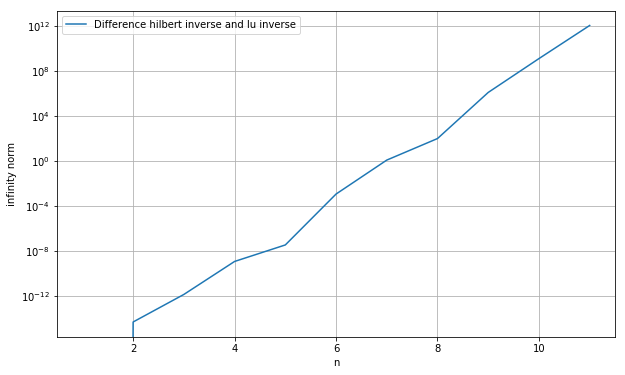

In [12]:
ns = np.arange(1, 12)
errors = []

for n in ns:
    hilbert = scipy.linalg.hilbert(n)
    
    hilbert_inverse = scipy.linalg.invhilbert(n)
    lu_inverse = inverse_lu(hilbert)
    
    error = scipy.linalg.norm(hilbert_inverse - lu_inverse, ord=np.inf)
    errors.append(error)
    
plt.semilogy(ns, errors, label="Difference hilbert inverse and lu inverse")
plt.xlabel("n")
plt.ylabel("infinity norm")
plt.legend()

## (d)
It is known that the $2$-condition number $cond_2(H_n)$ of the Hilbert matrix grows like $\mathcal O\left(\frac{(1+\sqrt{2})^{4n}}{\sqrt{n}}\right)$. Does the $\infty$-condition number (defined in Example 2.5) of $H_n$ grow in a similar way?
For the matrix inverse, try both your own matrix inversion routine, and `scipy.linalg.invhilbert`. Output a (`plt.semilogy`) graph showing your results.

In [13]:
def get_cn(A, A_inv, n):
    return scipy.linalg.norm(A, ord=n) * scipy.linalg.norm(A_inv, ord=n)

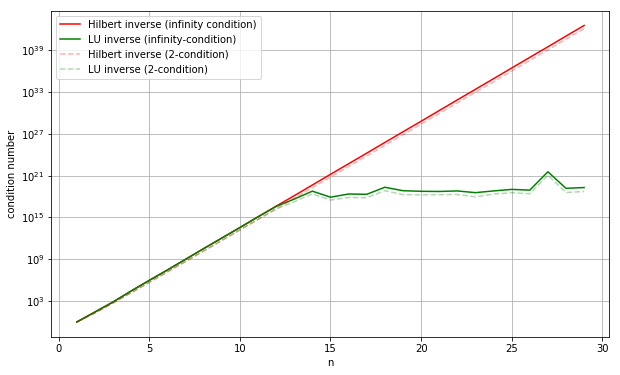

In [15]:
ns = np.arange(1, 30)

cn_hilb = []
cn_lu = []

two_cn_hilb = []
two_cn_lu = []

for n in ns:
    hilbert = scipy.linalg.hilbert(n)
    
    # hilbert inverse
    hilbert_inverse = scipy.linalg.invhilbert(n)
    cn_hilb.append(get_cn(hilbert, hilbert_inverse, np.inf))
    two_cn_hilb.append(get_cn(hilbert, hilbert_inverse, 2))
    
     # lu inverse
    lu_inverse = inverse_lu(hilbert)
    cn_lu.append(get_cn(hilbert, lu_inverse , np.inf))
    two_cn_lu.append(get_cn(hilbert, lu_inverse, 2))

plt.semilogy(ns, cn_hilb, "r", label="Hilbert inverse (infinity condition)")
plt.semilogy(ns, cn_lu, "g", label="LU inverse (infinity-condition)")
plt.semilogy(ns, two_cn_hilb, "r--", alpha=0.3, label="Hilbert inverse (2-condition)")
plt.semilogy(ns, two_cn_lu, "g--", alpha=0.3, label="LU inverse (2-condition)")
plt.xlabel("n")
plt.ylabel("condition number")
plt.legend()


To get the condition number of a matrix $A$ we must know its inverse $A^{-1}$. Since A is a hilbert matrix, we can use scipy's $hilbert\_inverse$ to get $A^{-1}$. Another way to get $A^{-1}$ is using its LU decomposition. In the figure we can see both approaches, for the $\infty$-condition number and the 2-condition number. 

This shows us that the 2-condition number and the $\infty$-condition number are growing in a similar way for $n < 13$. However we do see a difference in the approaches of getting the inverse matrix for $n >= 13$, where we can see that the condition numbers using the LU inverse are growing in a different way.

In [19]:
a = np.array([1, 1, 1, 1])

scipy.linalg.norm(A, ord=2)

2.0

In [49]:
v = np.array([[-1], [1], [1], [1]])

In [56]:
np.identity(4) - (2 * (np.matmul(v, (v.T)) / np.matmul((v.T, v) * a)))

ValueError: operands could not be broadcast together with shapes (2,) (4,) 

In [51]:
v * v.T

array([[ 1, -1, -1, -1],
       [-1,  1,  1,  1],
       [-1,  1,  1,  1],
       [-1,  1,  1,  1]])

In [45]:
v = [-1, 1, 1, 1]
vt = [[-1], [1], [1], [1]]

In [47]:
np.matmul(vt, v)

ValueError: shapes (4,1) and (4,) not aligned: 1 (dim 1) != 4 (dim 0)

In [58]:
v

array([[-1],
       [ 1],
       [ 1],
       [ 1]])